<a href="https://colab.research.google.com/github/haituly/Apply-Math-and-Machine-Learning-in-Python/blob/main/Hessenberg_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Code up a Hessenberg reduced implicitly shifted QR iteration

In [4]:
# We will create a function myHess(A) which returns the upper Hessenberg form of A.
# And we need to define 2 reflectMults function to implement myHess(A).
import numpy as np
def reflectMult1(A,w):
  w /= np.linalg.norm(w)
  A -= 2*np.outer(w,w@A)

def reflectMult2(A,w):
  w /= np.linalg.norm(w)
  A -= 2*np.outer(A@w,w)

def sgn(x):
  if x==0:
    return 1
  else:
    return np.sign(x)

# Code up a Hessenberg reduced implicitly shifted QR iteration.
def myHess(A):
    m,n=A.shape
    R=np.copy(A)
    for i in range(n-2):
      w=np.copy(R[i+1:,i])
      w[0]+=sgn(w[0])*np.linalg.norm(w)
      reflectMult1(R[i+1:,:],w)
      reflectMult2(R[:,i+1:],w)
    return R

In [2]:
# Now we can validate our code.
P=np.random.rand(50,50)
d=np.random.rand(50)
A=np.linalg.inv(P)@np.diag(d)@P
d.sort()
H=myHess(A)
eigen=np.linalg.eigvals(H)
eigen.sort()
print(np.allclose(eigen,d))
print(np.allclose(np.zeros((49,49)),np.tril(H[1:,:49],-1)))

True
True


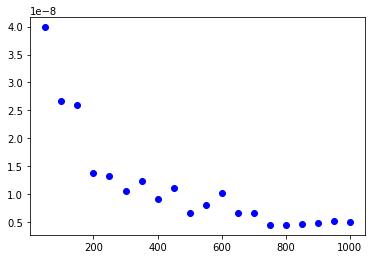

In [3]:
# We can further validate this code to make sure it won’t produce a bottleneck in eigenvalue computation.
from time import process_time as pt
n=20
k=50
times=np.zeros(n)
x=np.linspace(k,k*n,num=n)
for i in range(n):
  A=np.random.rand(k+i*k,k+i*k)
  start=pt()
  myHess(A)
  times[i]=(pt()-start)/(k+i*k)**3
from matplotlib import pyplot as plt
plt.plot(x,times,"bo")